# Eigenvalues - Solutions to Linear Systems

## Example Problem - Why are Eigenvalues important?

In a linear, dispersion-free medium ( $\epsilon$ and $\mu$ depend only on the observer's position), Maxwell's wave propagation equations can be rewritten as: 

$$ -\epsilon \frac{\partial^2 \mathbf{E}}{\partial t^2} = \nabla \times \mu^{-1} \nabla \times \mathbf{E} + \frac{\partial \mathbf{J}}{\partial t} \ (Eq. 1)$$

Maxwell's equations can be solved in the time domain or frequency domain. 

Time domain solutions are obtained by evolving an initial condition in time. Frequency domain solutions assume harmonic time depedence (solution functions are linear combinations of $e^{j\omega t}$) and are obtained by solving an eigenvalue problem.

### Example Problem Definition

Following the example above, and considering free space propagaiton in the absence of sources ($\mathbf{J} = 0$), and considering a harmonic time dependence, the wave equation can be written as:

$$ \epsilon \ \omega_m^2 \mathbf{E_m} = \mathit{L}[\mathbf{E_m}] \ (Eq. 2)$$

where $L \equiv \nabla \times \mu^{-1} \nabla \times $ a (second order in this case) hermitean linear operator. These kinds of problems pop up in many areas of physics and engineering, solving them means finding the pairs of eigen-values ($\omega_{m}^2$) and eigen-vectors ($\mathbf{E_m}$) characterising the solutions of problems written in the form $L[f] = \lambda f$.

### Problem's Domain Definition

If the (3D - volumetric) region $\Omega$ where Eq. 2 applies is a closed cavity with a perfectly conducting (2D - surface) boundary $\partial \Omega$ (where $\hat{n} \times \mathbf{E} = 0$) operator $L$ is self-adjoint and its eigenvalues are real and its eigenvectors are orthogonal: 

$$ \int_{\Omega} \mathbf{E_1} \cdot L[\mathbf{E_2}] dV = \int_{\Omega} \mathbf{E_2} \cdot L[\mathbf{E_1}] dV$$

for all vectors $\mathbf{E_1}$ and $\mathbf{E_2}$ satisfying the boundary conditions. This tells us that each solutions, or "modes" of propagation, are orthogonal to each other (either electric or magnetic vector field solutions).

### Finding the Eigenvalues - Finding the Frequencies of each Mode of Propagation

Multiplying Eq.2 by the complex conjugate of the electrical field $\mathbf{E_m}^*$ and integrating once (by parts) over the volume $\Omega$, we obtain:

$$ \omega_{m}^2 \int_{\Omega} \epsilon |\mathbf{E_m}|^2 dV = \int_{\Omega} \mu^{-1} |\nabla \times \mathbf{E_m}|^2 dV \ (Eq. 3)$$

Eq. 3 clearly states that in order to determine the frequencies of each mode of propagation, we need to solve an eigenvalue problem, where each eigenvalue is $\omega_m^2$, defined by: 

$$ \omega_{m}^2 = \frac{\int_{\Omega} \mu^{-1} |\nabla \times \mathbf{E_m}|^2 dV}{\int_{\Omega} \epsilon |\mathbf{E_m}|^2 dV} \ (Eq. 4)$$

## Frequency-Domain Eigenvalue Problems - The 1D Helmholtz Equation

The helmholtz equation is a second order partial differential equation that describes the propagation of waves in a medium. It is a generalization of the wave equation, and is given by:

$$ \nabla^2 \mathbf{E} + k^2 \mathbf{E} = 0 \ (Eq. 5)$$

where $k$ is the wavenumber defining the periodicity of the static wave propagating through the medium, and $\mathbf{E}$ is the electric field. This problem lets us find each wave-number, and thus, the spatial frequency of each mode of propagation.

Considering the 1D case, the Helmholtz equation, in a medium defined between $0 < x < a$, can be written as:

$$ \frac{d^2 \mathbf{E_m}}{dx^2} = - k_m^2 \mathbf{E_m} \ (Eq. 6)$$

with boundary conditions $\mathbf{E_m}(0) = \mathbf{E_m}(a) = 0$, and where $k$ is the wave-number, and $\mathbf{E}$ is the electric field. The eigen-values of the Helmholtz equation are the wave-numbers, and the eigen-vectors are the electric field solutions.

The analytical solution of the eigen-values to Eq. 6 is actually quite simple to compute. Considering eigen-functions of the form $\mathbf{E_m} = A \sin(k_m x) + B \cos(k_m x)$, and applying the boundary conditions, we obtain:

$$ k_m = \frac{m \pi}{a} \rightarrow k_m = 1,\ 2,\ 3, ... (a=\pi \ [m])\ (Eq. 7)$$

where $m$ is a positive integer. This means that the eigen-values of the Helmholtz equation are the wave-numbers, and the eigen-vectors are the electric field solutions.

This problem is of type $L[f] = \lambda f$, where $L \equiv \frac{d^2}{dx^2}$, $\lambda = -k^2$ and $f = \mathbf{E_m}$. Let us trasform this problem into a discrete eigenvalue problem by applying the finite difference method, and solve it iteratively using. When discretizing such kinds of problems, the resulting linear system of equations is of the form: 

$$ A f = \lambda f = b \ (Eq. 7)$$

where $A$ is the coefficients matrix.

Considering a discrete-space medium with $N$ points, where the spatial step of the algorithm is $h = a/N$, applying the finite differences method to Eq.6 we get:

$$ \frac{f_{i-1} - 2f_i + f_{i+1}}{h^2} = -k^2 f_i$$ 

which can be rewritten as:

$$ [f_{i-1} \ f_i \ f_{i+1}] \cdot \frac{1}{h^2}[1 \ {-2} \ 1]^T = -k^2 f_i $$

where $h$ is the step size, and $f_i$ is the value of the electric field at the $i$-th point. This equation can be written in matrix form for every point in the domain, resulting in a linear system of equations of the form $A f = \lambda f = b$, where

$$ A = \frac{1}{h^2} \begin{bmatrix} -2 & 1 & 0 & 0 & 0 \\ 1 & -2 & 1 & 0 & 0 \\ 0 & 1 & -2 & 1 & 0 \\ 0 & 0 & 1 & -2 & 1 \\ 0 & 0 & 0 & 1 & -2 \end{bmatrix}$$

for $N = 5$. Note that, whatever the size of the domain, the matrix $A$ will always be sparse. This enables the use sparse matrix memory allocation methods to save space and increase computational speed of the algorithm.

It is important to note that this problem is a frequency-domain problem, once we're looking for the spatial frequencies of each mode of propagation - the wave-number $k$.

In [382]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [383]:
# Define the domain
NP = 100 # Number of points
a = np.pi # domain length
h = a / (NP) # grid spacing
h

0.031415926535897934

In [384]:
# Allocate the sparse matrix
upper_diag = np.ones(NP-1) * (1 / h**2)
lower_diag = np.ones(NP-1) * (1 / h**2)
main_diag = np.ones(NP) * (-2 / h**2)
A = sp.sparse.diags([upper_diag, main_diag, lower_diag], [1, 0, -1])

In [385]:
# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = sp.sparse.linalg.eigs(A, which='SM')
lams = np.linalg.eig(A.todense())[0]
ks = np.sqrt(np.sort(-lams)).real
print(ks)
k = np.sqrt(np.sort(-eigenvalues)).real
print(k)

[ 0.9900591   1.97987872  2.96921947  3.95784204  4.94550732  5.93197641
  6.91701071  7.90037196  8.88182233  9.86112442 10.83804137 11.81233688
 12.7837753  13.75212167 14.71714176 15.67860216 16.63627033 17.58991462
 18.53930438 19.48420997 20.42440285 21.35965561 22.28974204 23.21443717
 24.13351734 25.04676025 25.95394501 26.85485221 27.74926393 28.63696383
 29.51773722 30.39137105 31.25765401 32.11637657 32.96733103 33.81031157
 34.64511429 35.47153728 36.28938065 37.09844657 37.89853937 38.68946551
 39.4710337  40.24305489 41.00534235 41.75771171 42.49998099 43.23197064
 43.95350363 44.66440544 45.3645041  46.0536303  46.73161735 47.39830126
 48.05352077 48.69711741 49.32893551 49.94882225 50.5566277  51.15220484
 51.73540961 52.30610096 52.86414086 53.40939432 53.94172946 54.46101753
 54.96713292 55.45995322 55.93935924 56.405235   56.85746783 57.29594835
 57.7205705  58.13123157 58.52783224 58.91027658 59.27847209 59.6323297
 59.97176384 60.29669239 60.60703678 60.90272193 61.

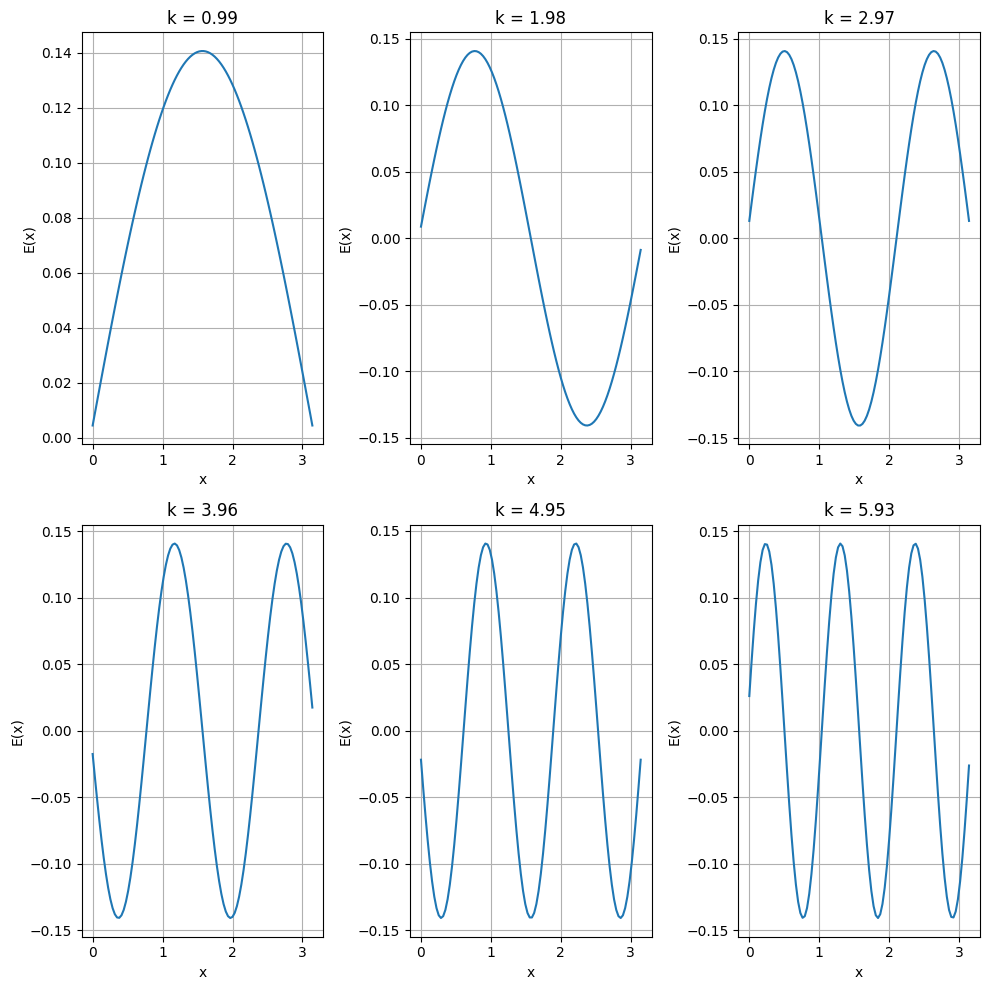

In [386]:
# representation of the eigenfunctions
x = np.linspace(0, np.pi, 100)
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
for i in range(2):
    for j in range(3):
        ax[i, j].plot(x, eigenvectors[:, 3*i+j].real)
        ax[i, j].set_title(f'k = {k[3*i+j]:.2f}')
        ax[i, j].set_xlabel('x')
        ax[i, j].set_ylabel('E(x)')
        ax[i, j].grid()
        
fig.tight_layout()

In [387]:
def compute_helmoltz_1D (
  num_points = 100,
  a = 1.0, 
):
  # Define the domain
  h = a / (num_points) # grid spacing
  # Allocate the sparse matrix
  upper_diag = np.ones(num_points-1) * (1 / h**2)
  lower_diag = np.ones(num_points-1) * (1 / h**2)
  main_diag = np.ones(num_points) * (-2 / h**2)
  A = sp.sparse.diags([upper_diag, main_diag, lower_diag], [1, 0, -1])
  # Compute the eigenvalues and eigenvectors
  eigenvalues, eigenvectors = sp.sparse.linalg.eigs(A, which='SM')
  k = np.sqrt(np.sort(-eigenvalues)).real
  return k, eigenvectors

In [388]:
nx = [2**i for i in range(3, 12)]
k_array = [compute_helmoltz_1D(num_points=n, a=np.pi)[0] for n in nx]

In [389]:
import prettytable as pt
table = pt.PrettyTable()
table.add_column("nx", nx)
table.add_column("h", [1/(n-1) for n in nx])
for i in range(len(k_array[0])):
  table.add_column(f"k{i}", [k[i] for k in k_array])
print(table)

+------+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|  nx  |           h           |         k0         |         k1         |         k2         |         k3         |         k4         |         k5        |
+------+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|  8   |  0.14285714285714285  | 0.8843829067069331 | 1.7418942863129183 | 2.546479089470325  | 3.273690414074772  | 3.9014323120148333 | 4.410631163374335 |
|  16  |  0.06666666666666667  | 0.9398377919721159 | 1.8716572192806058 | 2.787508327121938  | 3.679577396764017  | 4.540253609439357  | 5.362193979167292 |
|  32  |  0.03225806451612903  | 0.9693308294567645 | 1.9364658128150958 | 2.899214078274176  | 3.8553946913601878 | 4.802841595444312  | 5.739408518557683 |
|  64  |  0.015873015873015872 | 0.9845195514735468 

## Time-Domain Eigenvalue Problems - The 1D Wave Equation Revisited

Revisiting the 1D Helmoltz equation for wave propagation, we can now use its time-domain form to compute the intensity of a field at a given position through time. One common way to do this is to use a time-domain finite difference method to solve the time-domain wave equation given by:

$$ \frac{\partial^2 \mathbf{E_m}}{\partial x^2} = -\omega_m^2 \mathbf{E_m} \ (Eq. 8)$$


where $\omega_m$ is the frequency of each of the propagating modes within the medium.
Rewriting Eq. 8 using the $L$ operator, we get:

$$ L[\mathbf{E_m}] = -\omega_m^2 \mathbf{E_m} \ (Eq. 9)$$

Eq. 8 or 9 is actually the frequency-domain formulation of the 1D time-domain wave equation represented in Eq. 10, where the eigen-vector solutions $\mathbf{E_m}$ are assumed to be harmonic and it results from a fourier transformation of Eq. 10. This equation is useful to compute the frequency of each mode of propagation directly. However, the time-domain formulation of the problem is actually more efficient to compute the intensity of the field at a given position at each time step, once the time-stepping is explicit and non depedant on values of the eigen-vector in future time steps when applying the finite difference method (Eq. 11):

$$ \frac{\partial^2 \mathbf{E_m}}{\partial t^2} = L[\mathbf{E_m}] \ (Eq. 10)$$


By applying the finite difference method to the time-domain equation, we obtain an explicit time-stepping expression:

$$ \frac{f^{n+1} - 2f^n + f^{n-1}}{\Delta t^2} = L[f^n] \ (Eq. 11)$$

where $f^n$ is the value of the electric field at the $n$-th time step, and $\Delta t$ is the time step of the algorithm.

### von Neumann Stability Analysis - Choosing $\Delta t$ carefully

One important issue with explicit time-stepping is knowing what is the appropriate time step to use in the algorithm. The time step must be chosen carefully to ensure that the algorithm is stable. A time-step that is too large will make the algorithm unstable, and a time-step that is too small will make the algorithm too slow, and it can also lead it to be unstable as well.

Now, this is a discrete system, with discrete time-steps between each computed value of the solution function. One way to analyse the stability of the time-stepping algorithm is performing a von Neumann stability analysis. This analysis is based on the fact that any discrete time equation with no explicit time dependance has solutions of the form: $f^n = f_\omega \rho^n$ (geometrical sequences in discrete time). Second of all, is performed by computing the zeros and poles of the discrete system and checking the trajectories of the poles in the phase complex plane by increasing the amplification factor $\rho$.

Replacing $f^n = f_\omega \rho^n$ into Eq. 11, and assuming that in the time-domain formulation of the problem $L \equiv -\omega^2$, we get the following second order root equation for $\rho$:

$$ \rho^2 -[2-(\omega \Delta t)^2]\rho + 1 = 0 \ (Eq. 12)$$

with root solutions:

$$ \rho = 1 - \frac{1}{2}(\omega \Delta t)^2 \pm j \omega \Delta t \sqrt{1 - \frac{1}{4}(\omega \Delta t)^2} \ (Eq. 13)$$

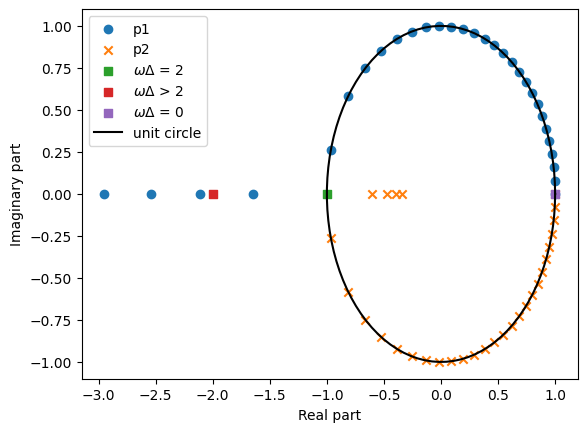

In [390]:
# Let us analyse the trajectory of the roots when increasing 
# the amplification factor

import numpy
import matplotlib.pyplot as plt

omega_dt = np.linspace(0, 2.3, 30)
p1 = 1 - 0.5*omega_dt**2 + 1j*omega_dt*np.sqrt(1-0.25*omega_dt**2, dtype=complex)
p2 = 1 - 0.5*omega_dt**2 - 1j*omega_dt*np.sqrt(1-0.25*omega_dt**2, dtype=complex)

plt.scatter(p1.real, p1.imag, label='p1', marker='o')
plt.scatter(p2.real, p2.imag, label='p2', marker='x')

# point at the place where omega_dt = 2
plt.scatter(-1, 0, label='$\omega \Delta$ = 2', marker='s')

# point at the place where omega_dt = 2.3
plt.scatter(-2, 0, label='$\omega \Delta$ > 2', marker='s')

# point at the place where omega_dt = 0
plt.scatter(1, 0, label='$\omega \Delta$ = 0', marker='s')

# plot the unit circle
t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(t), np.sin(t), label='unit circle', color='black')

plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
fig.tight_layout()

As observed in the root locus of the discrete-time system above, the algorithm will only be stable if the poles of the system are inside the unit circle in the complex plane. This means that the algorithm will only be stable if:

$$ \Delta t \le \frac{2}{|\omega_{max}|} \ Eq. 12$$

This equation is translated into the Nyquist theorem applied to the stability of the time-stepping algorithm - the explicit time-stepping algorithm will only be stable if the time step is small enough to obtain at least 2 samples of the fastest oscillating harmonic of the solution function space within the time-domain of the problem. 

How well does the time-stepping algorithm approximate the true oscillating harmonic of the system? The amplification factor per time step can actually be analytically defined, and is given as:

$$e^\pm j \omega t = 1 \pm j \omega t - \frac{1}{2}(\omega \Delta t)^2 \mp \frac{j}{6}(\omega \Delta t)^3 + ...$$

Whereas the amplification factor obtained through the explicit time-stepping algorithm can be determined to be: 

$$e^\pm j \omega t = 1 \pm j \omega t - \frac{1}{2}(\omega \Delta t)^2 \mp \frac{j}{8}(\omega \Delta t)^3 + ...$$

Correspoding to an error aproximating $(\omega \Delta t)^2/24$. In the Fine Element Method chapter, implicit time-stepping methods will be explored, removing the limits / conditions for the minimum time-step of the system of equations, enabling the study of time-domain solutions on a higher variety of geometric domains.

### Practical Example: Solving the 1D wave equation:

Considering a spatial domain of $0<x<a$, with boundary conditions $\mathbf{E_m}(0,t) = \mathbf{E_m}(a,t) = 0$ for any time instant $t$ of the simulation.

$$ \frac{\partial^2 \mathbf{E_m}}{\partial t^2} = \frac{\partial^2 \mathbf{E_m}}{\partial x^2} = L[\mathbf{E_m}] $$

Applying the finite difference method to the time and space domains, we obtain:

$$f_i^{(n+1)} = 2f_i^{(n)} - f_i^{(n-1)} + \left( \frac{\Delta t}{h} \right)^2 \left( f_{i+1}^{(n)} + f_{i-1}^{(n)} - 2f_{i}^{(n)}\right)$$

where $i$ is the index of the $i^{th}$ spatial point of the domain grid and $n$ is the index of the $n^{th}$ time-step.

This system can be represented in vectorial form as:

$$ f^{(n+1)} = f^{(n)}A - f^{(n-1)}$$

with:

$$ A = \alpha \begin{bmatrix} 2\left(\frac{1-\alpha}{\alpha}\right) & 1 & 0 & 0 & 0 \\ 1 & 2\left(\frac{1-\alpha}{\alpha}\right) & 1 & 0 & 0 \\ 0 & 1 & 2\left(\frac{1-\alpha}{\alpha}\right) & 1 & 0 \\ 0 & 0 & 1 & 2\left(\frac{1-\alpha}{\alpha}\right) & 1 \\ 0 & 0 & 0 & 1 & 2\left(\frac{1-\alpha}{\alpha}\right) \end{bmatrix} $$

given that $\alpha = \left(\frac{\Delta t}{h}\right)^2$ (and, in this example, $N = 5$).

In [391]:
import numpy as np
import scipy as sp
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt
from scipy.signal import hann, hamming, blackmanharris, blackman, gaussian, kaiser, cosine, parzen
windows = {
    "rectangular": lambda x, np: x,
    "hanning": lambda x, np: x*hann(np),
    "hamming": lambda x, np: x*hamming(np),
    "blackmanharris": lambda x, np: x*blackmanharris(np),
    "blackman": lambda x, np: x*blackman(np),
    #"gaussian": lambda x, np: x*gaussian(np),
    #"kaiser": lambda x, np: x*kaiser(np),
    "cosine": lambda x, np: x*cosine(np),
    "parzen": lambda x, np: x*parzen(np),
}

In [392]:
def compute_1d_wave(
  a=np.pi, #the length of the domain in space
  tmax=1.0, # the stopping time of the simulation
  nx=100, # the number of sub-intervals of the domain (0, a)
  xobs=0, # the location in space of the observer of the time-domain signal
  tol=1e-15,
  window='blackmanharris'
):
  # initialize with random numbers
  f0 = np.random.rand(nx+1)*tol
  #f0 = tol*np.ones(nx+1)
  #boundary conditions
  f0[0] = f0[-1]= 0
  
  f1 = tol*np.random.rand(nx+1)
  #f1 = tol*np.ones(nx+1)
  #boundary conditions
  f1[0] = f1[-1]= 0
  
  # for stability reasons, dt < dx -> 2.dt < 2.dx
  dx = a / nx
  d2tmax = 1.98 * dx
  ntime = int(np.round(tmax/d2tmax + 1)) # number of time steps
  dt = tmax/(2*ntime) # minimum time-step to guarantee stability
  
  # Initialize the sparse matrix
  alph = (dt / dx) ** 2
  upper_diag = np.ones(nx)*alph
  lower_diag = np.ones(nx)*alph
  diag = 2*(np.ones(nx+1) - alph)
  A = sp.sparse.diags([upper_diag, diag, lower_diag], [1, 0, -1])
  sig = np.zeros(ntime)
  x_domain = np.linspace(0.0, a, nx+1)
  i_sample = np.argmin(np.abs(xobs - x_domain))
  
  # for each time step, update the present time-step f solution:
  for n in range(1, ntime): # every n means 2 time-steps to speed up the algorithm
    # update the previous time step
    f0 = A.dot(f1) - f0 # f0' contains f^{n}, f1 contains f^{n-1} and f1 contains f^{n-2}
    sig[n-1] = f0[i_sample] # sample the solution f in space to obtain the time varying signal
    # update the present time step
    f1 = A.dot(f0) - f1
    sig[n] = f1[i_sample]
  assert window in windows, f"{window} not in {list(windows.keys())}"
  sig = windows[window](sig, ntime)/tol
  # compute the fft of the time signal
  t_domain = dt * np.arange(ntime)
  # compute the frequency axis
  f_domain = fftshift(fftfreq(ntime, dt))  # [Hz]
  # compute the FFT
  sig_f = abs(fftshift(fft(sig, norm='forward')))
  return (t_domain, sig, f_domain, sig_f)

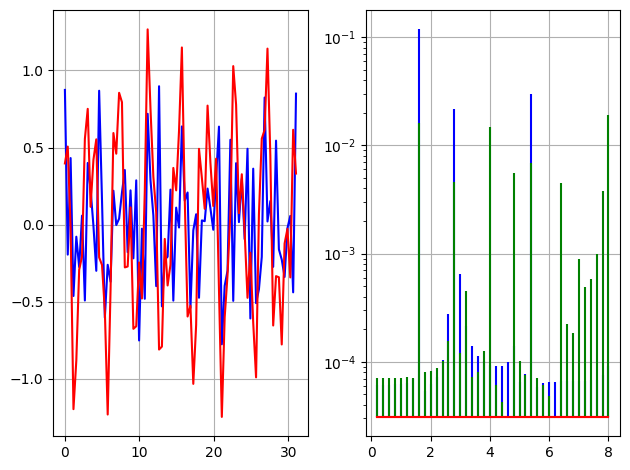

In [400]:
nx = 2**3
tt, s, ff, sf = compute_1d_wave(a=np.pi, tmax=20*np.pi, nx=nx, xobs=np.pi, window='rectangular') # observe signal at the begining of the domain (left boundary)
_, s2, _, sf2 = compute_1d_wave(a=np.pi, tmax=20*np.pi, nx=nx, xobs=np.pi/2, window='rectangular') # observe signal halfway at the domain

# plot 
fig, ax = plt.subplots(1,2)
ax[0].plot(tt, s, 'b')
ax[0].plot(tt, s2, 'r')
ax[0].grid()

#ax[1].plot(ff[ff>0]*2*np.pi, (sf*sf)[ff>0], 'b')
#ax[1].plot(ff[ff>0]*2*np.pi, (sf2*sf2)[ff>0], 'r')

markerline, _, _ = ax[1].stem(
  ff[ff>0]*2*np.pi,
  (sf2*sf2)[ff>0],
  bottom=np.min((sf*sf)[ff>0]),
  linefmt="b-",
  markerfmt="none",
  basefmt="r-",
)
markerline, _, _ = ax[1].stem(
  ff[ff>0]*2*np.pi,
  (sf*sf)[ff>0],
  bottom=np.min((sf*sf)[ff>0]),
  linefmt="g-",
  markerfmt="none",
  basefmt="r-",
)
markerline.set_markerfacecolor("none")
ax[1].set_yscale('log')
#ax[1].set_xlim([0.1, 50.0])
ax[1].grid()
fig.tight_layout()

In [401]:
# Extract each harmonic of the spectrum, to compute the frequency of each mode of propagation
n_harmonics = 6
span = 1
harmonics = []
harmonics_s2 = []
sf = sf[ff>0]
ff = ff[ff>0]
for i in range(n_harmonics):
  max_pow = np.argmax((sf*sf))
  harmonics.append(ff[max_pow]*2*np.pi)
  sf[max_pow - span: max_pow+span] = 0
harmonics = np.sort(harmonics)

In [402]:
harmonics

array([1.6, 2.8, 4. , 4.8, 5.4, 8. ])

This algorithm lets us compute the frequency of each mode of propagation by evolving the initial condition in time. The eigen-values of the time-domain wave equation are the frequencies of each mode of propagation, computed through a Fast Fourier Transform of time-domain solution found through the finite difference method of the Helmholtz equation.